# (Ford Go Bike Dataset Anaysis)
## by (Aljoharah AlDamigh)

## Investigation Overview

This ducoment include an investigation of the Ford GoBike Dataset I was intrestd in knowing what are the common behaviors and characteristics of thier client.

## Dataset Overview

Ford Go Bike is a bike sharing system located the Bay Area. it was interduce in 2013 in san francisco and san jose and now its expanded to cover the east bay as well.the bikes are avaliable 24 hour all year long, the users can take the bike form one station and return it in a nother station. 


In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [10]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201806-fordgobike-tripdata.csv')
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
111441,507,2018-06-14 08:38:35.7540,2018-06-14 08:47:03.3530,11.0,Davis St at Jackson St,37.797280,-122.398436,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,4015,Subscriber,No
114199,330,2018-06-13 18:46:06.6090,2018-06-13 18:51:37.5550,102.0,Irwin St at 8th St,37.766883,-122.399579,89.0,Division St at Potrero Ave,37.769218,-122.407646,373,Subscriber,No
19218,732,2018-06-28 07:46:08.7730,2018-06-28 07:58:21.4390,123.0,Folsom St at 19th St,37.760594,-122.414817,37.0,2nd St at Folsom St,37.785000,-122.395936,2588,Subscriber,No
28822,896,2018-06-26 19:04:42.5320,2018-06-26 19:19:39.2620,31.0,Raymond Kimbell Playground,37.783813,-122.434559,70.0,Central Ave at Fell St,37.773311,-122.444293,213,Subscriber,No
194676,130,2018-06-01 09:01:21.8460,2018-06-01 09:03:32.1140,88.0,11th St at Bryant St,37.770030,-122.411726,77.0,11th St at Natoma St,37.773507,-122.416040,2043,Subscriber,No


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## ( Go Ford Trips Duration)

The data seen in the figure below  hasa  right skew issue it has wide range from 60 to 8600 with the mean of 1000.

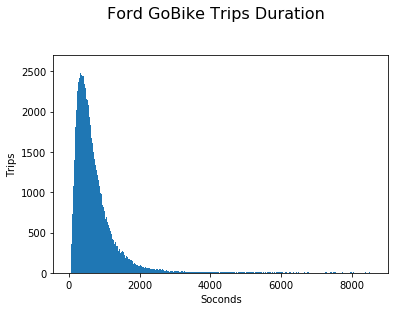

In [8]:
#Determine the range of th x axes
bins = np.arange( 0, 8600,10)
#determine the values of the data and x axes 
plt.hist(data = df, x = 'duration_sec', bins = bins);
#Determine Label for x and y exes 
plt.xlabel('Soconds')
plt.ylabel('Trips');

#Determine the title 
plt.suptitle('Ford GoBike Trips Duration', y=1.05, fontsize=16);

## (Most common users)

The number of subscriber is almost 4 times larger thsn the number of regular cutomers 

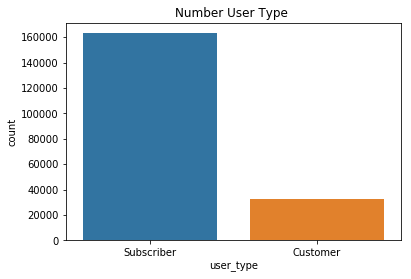

In [14]:
#Determine the value of the data and the title 
plt = sb.countplot(data = df, x = "user_type", order = df.user_type.value_counts().index).set_title('Number User Type ');



## Duration  taken by diffrent used type with diffrent bike share option

Customer without bike sharing took the longer time followed by subscriber with bike sharing option and lastly subscriber without sharing option 

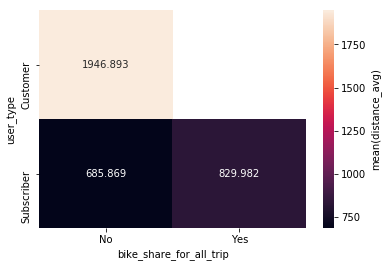

In [19]:
#Createing multivalue exploration 
cat_means = df.groupby(['bike_share_for_all_trip', 'user_type']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'bike_share_for_all_trip',
                            values = 'duration_avg')
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(distance_avg)'});

In [ ]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle